In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

# Reading Dataset and Understanding Data

In [2]:
bs=pd.read_csv(r"C:\Users\Anurag Aditya\Downloads\day.csv")

In [3]:
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#check the shape 730 rows,16 columns
bs.shape

(730, 16)

In [5]:
#Check if there is any nullvalue and also the data type
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Check how many columns are int type
bs.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Cleaning the Data: 

1. Drop columns that are not useful for analysis
2. Instant is a row identifier.
3. casual and registered column is not required because we have cnt column which is a sum of casual + registered 

In [7]:
# Droping instant column as it is index column which has nothing to do with target
bs.drop(['instant'],axis=1, inplace = True)

In [8]:
#Dropping casual and registered column 
bs.drop(['casual'], axis = 1, inplace = True)
bs.drop(['registered'], axis = 1, inplace = True)
# Dropping dteday as we have already have month and weekday.
bs.drop(['dteday'], axis = 1, inplace = True)

In [9]:
bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Handle Missing values

In [10]:
#We hvaealready checked there is no null values just to reverify. 
bs.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

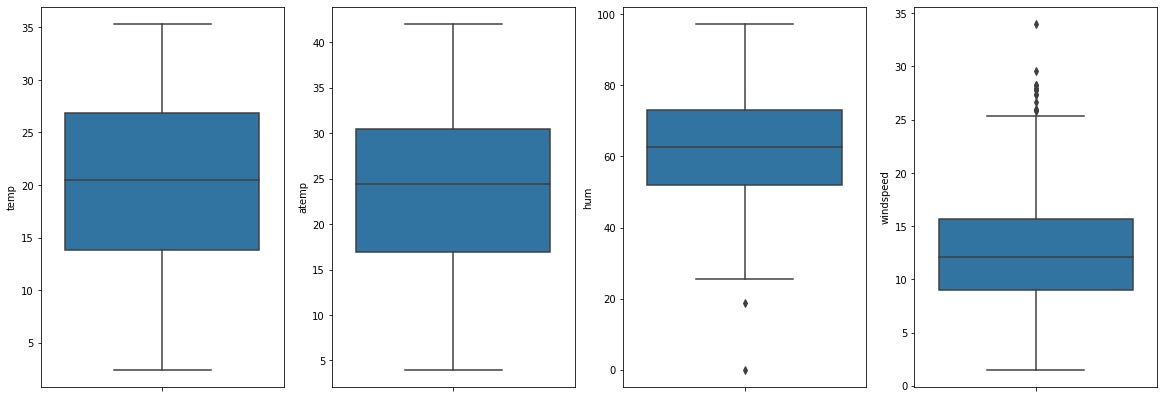

In [11]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,7))

i = 1
for a in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=a, data=bs)
    i=i+1

There are no outliner in all 4 columns ( temp, atemp, hum, windspeed)

# EDA : 

In [12]:
bs.weekday = bs.weekday.replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'})
bs.mnth = bs.mnth.replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})
bs.season.replace({1:"Spring", 2:"Summer", 3:"Autumn", 4:"Winter"},inplace = True)
bs.weathersit.replace({1:'Good',2:'Moderate',3:'Bad',4:'Severe'},inplace = True)
bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Good,9.305237,11.46350,43.6957,12.522300,1600


<Figure size 720x1440 with 0 Axes>

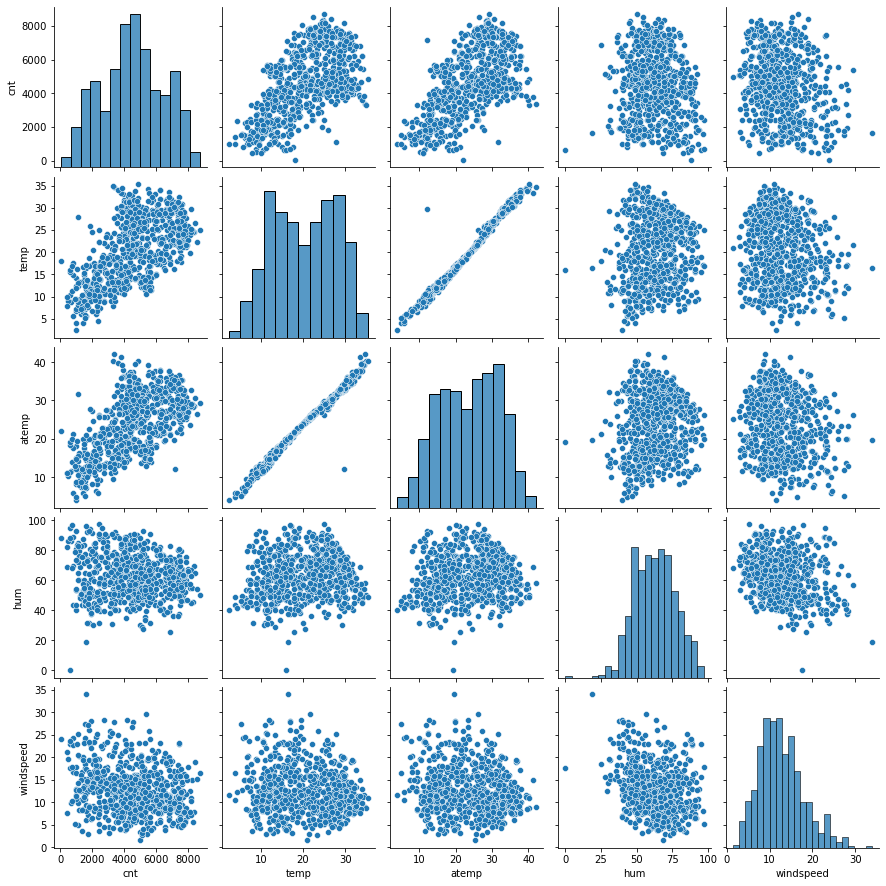

In [13]:
#To check the linear relationship

plt.figure(figsize = (10,20))
sns.pairplot(data=bs,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()


Inference:
1. temp and atemp has the highest corelation with the target variable cnt.
2. temp and atemp are highly co-related with each other cnt variable has a linear relationship with variables like temp, atemp.

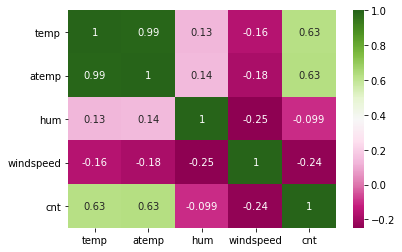

In [14]:
# Continuous variables relationship with each other
sns.heatmap(bs[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='PiYG', annot = True)
plt.show()

It can be see that temp and atemp has 0.99 correlation which is highly correlated.

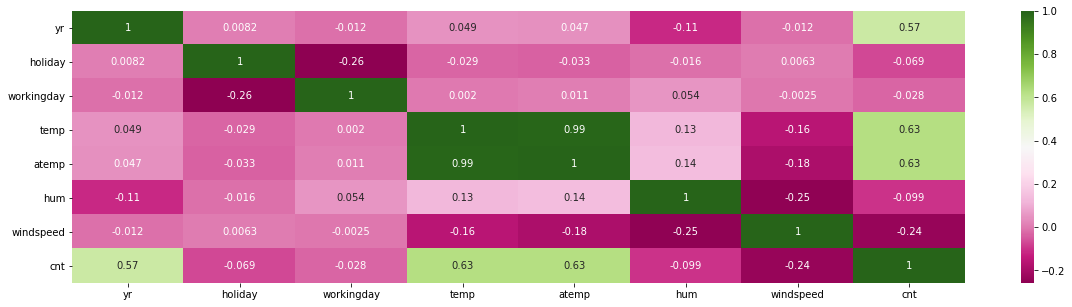

In [15]:
#Correlations for numeric variables
plt.figure(figsize=(20,5))
num_cor=bs.corr()
sns.heatmap(num_cor, cmap="PiYG", annot = True)
plt.show()

Target variable has a linear relationship with some of the indeptendent variables we can build a linear regression Model.

categorical variabels Vs target variables

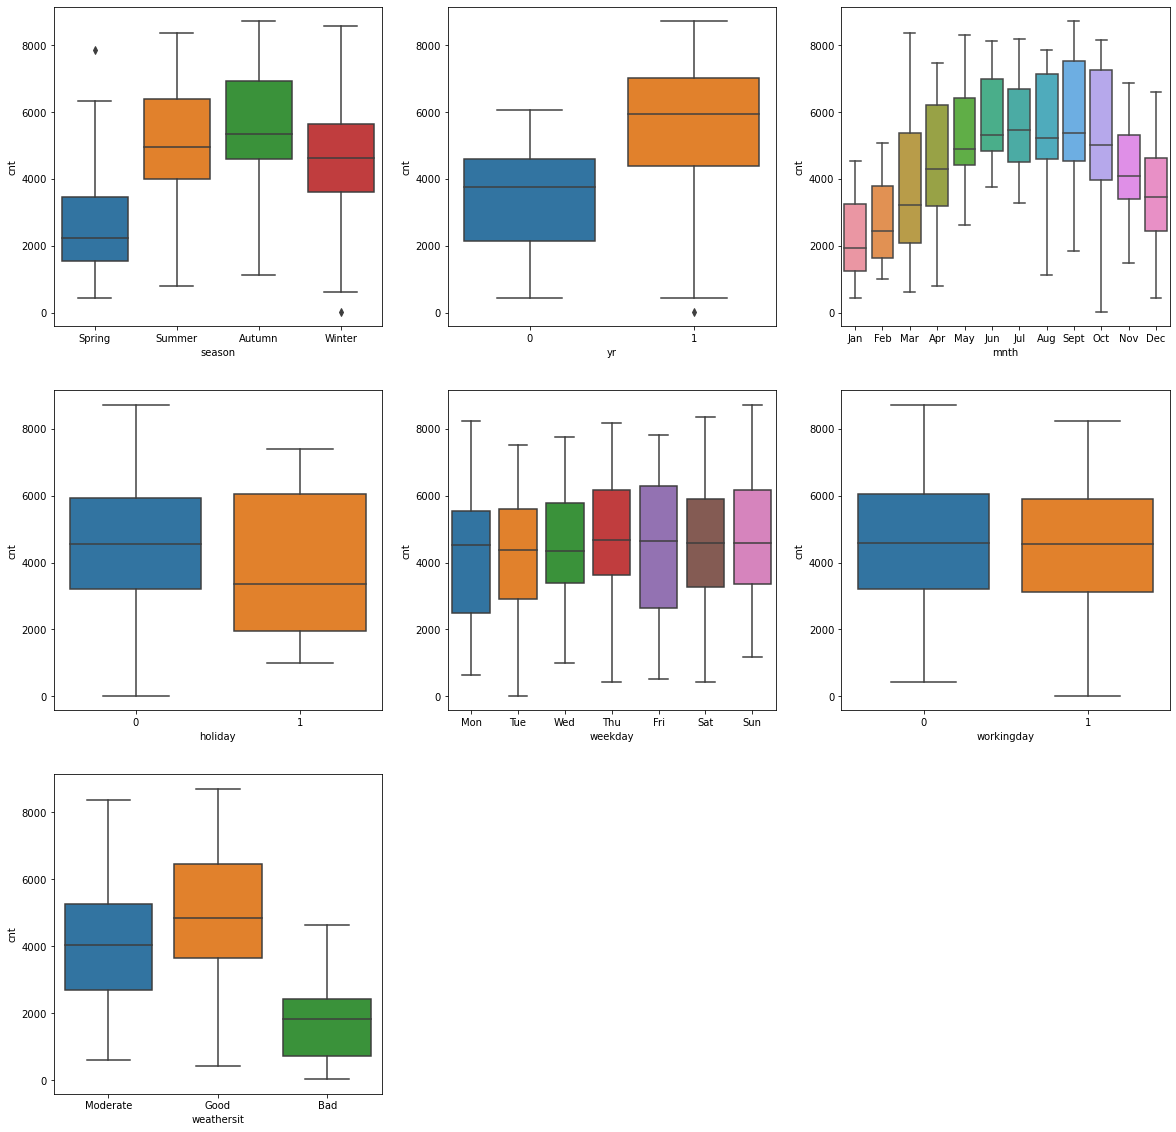

In [16]:
# Boxplot for categorical variables to see demands
cate = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(20, 20))

for i in enumerate(cate):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bs, x=i[1], y='cnt')
plt.show()

Inferences : 

1. Autumn season have the highest demand for bike
2. Spring have the lowest demand of bike
3. As compared to the previous year for the next year the demand of bike is increased. 
4. Sept have the highest demand while Jan is the lowest.
5. Demand for the bike is low when there is a holiday. 
6. The Good weathershit has highest demand

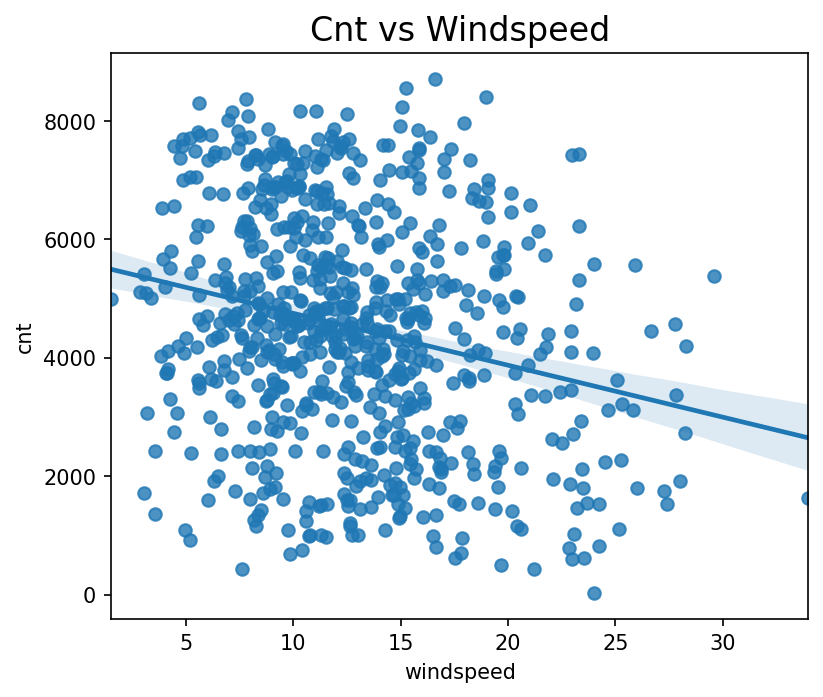

In [17]:
plt.figure(figsize=(6,5),dpi=150)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bs,y="cnt",x="windspeed")
plt.show()

We can see that cnt is decreasing when windspeed is increasing. 

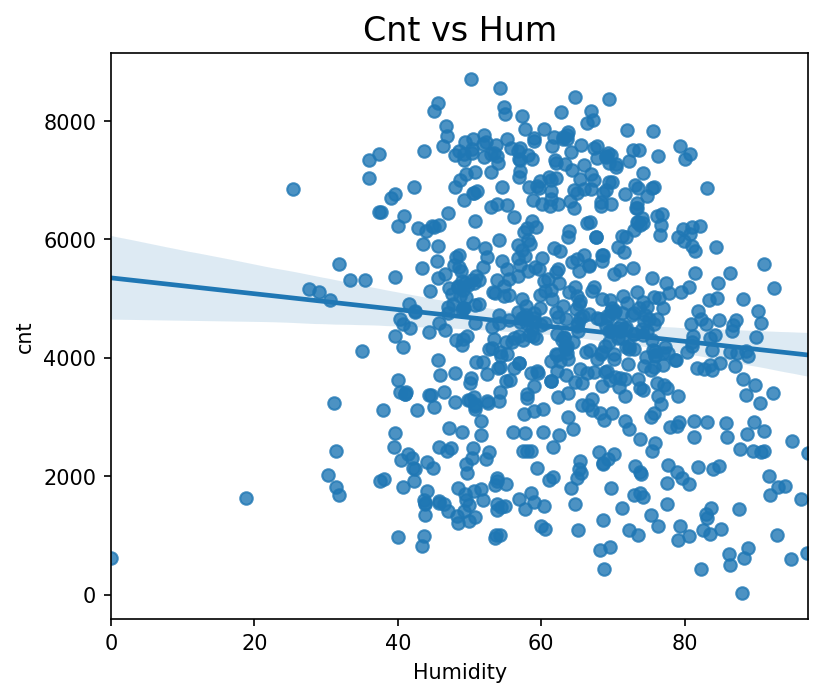

In [18]:
plt.figure(figsize=(6,5),dpi=150)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bs,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

We can see that cnt is decreasing when humidity is increasing. 

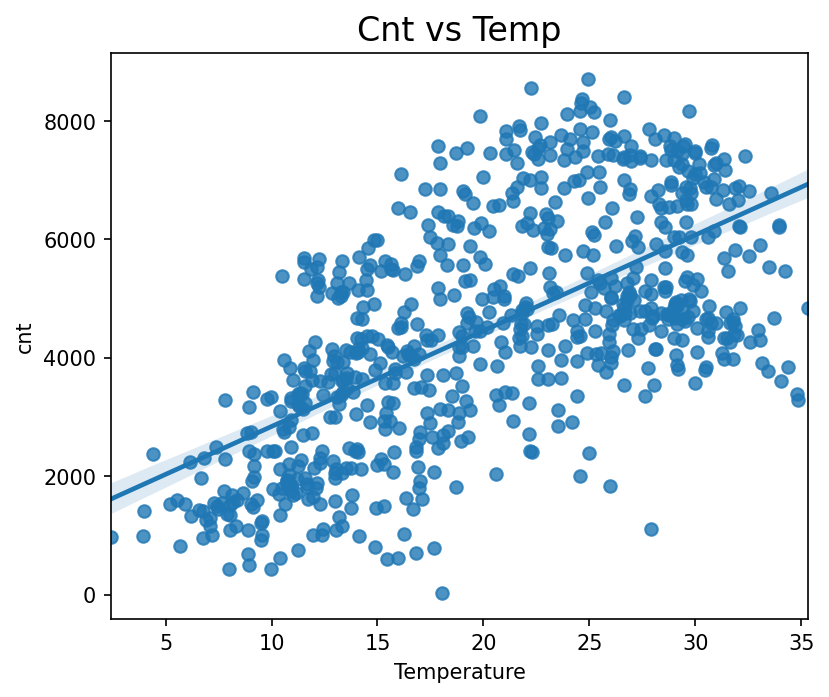

In [19]:
plt.figure(figsize=(6,5),dpi=150)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bs,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

1. We can see that cnt is linearly increasing with temp indicating linear relation.
2. Demand for bikes is more when the temperature is more. It is directly proportional. 

# Data Preparation for Linear Regression

In [20]:
# Create dummy variables for all categorical variables

bs = pd.get_dummies(data=bs,columns=["season","mnth","weekday"],drop_first=True)
bs = pd.get_dummies(data=bs,columns=["weathersit"])

1. Dropping the first columns as (p-1) dummies can explain p categories.
2. In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [21]:
#Print columns after creating dummies
bs.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate'],
      dtype='object')

# Model Building

Split Data into training and test

In [22]:
bs.shape

(730, 31)

In [23]:
#X is all other variable also our independent variables
X=bs

#y to contain only target variable
y=bs.pop('cnt')

In [24]:
#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


In [26]:
#Inspect independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,0,0,1,0


Feature Scaling continuous variables
1. Make all features in same scale to interpret easily
2. temp,hum,windspeed are continous

In [27]:
# Let us scale continuous variables
cont_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[cont_vars] = scaler.fit_transform(X_train[cont_vars])

In [28]:
#Inspect stats from Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.250489,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.433719,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,0.500000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,...,0,0,0,0,1,0,0,0,0,1


Building a Model using RFE and Automated approach

In [30]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [32]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 12),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 9),
 ('mnth_Jan', False, 14),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', True, 1),
 ('mnth_May', False, 2),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 4),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 5),
 ('weekday_Sat', False, 10),
 ('weekday_Sun', False, 8),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 16),
 ('weekday_Wed', False, 6),
 ('weathersit_Bad', True, 1),
 ('weathersit_Good', True, 1),
 ('weathersit_Moderate', False, 3)]

# Manual elimination
Function to build a model using statsmodel api

In [33]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def mdl(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [34]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [35]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sept', 'weathersit_Bad', 'weathersit_Good'],
      dtype='object')

In [36]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_Summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jun', 'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Moderate'],
      dtype='object')

In [37]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sept', 'weathersit_Bad', 'weathersit_Good']]

In [38]:
X_train_rfe.shape

(511, 15)

# Build Model
Lets start with variables selected by RFE

In [39]:
cols=['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sept', 'weathersit_Bad', 'weathersit_Good']
mdl(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.7
Date:                Thu, 21 Oct 2021   Prob (F-statistic):          4.43e-186
Time:                        16:30:26   Log-Likelihood:                -4123.9
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     495   BIC:                             8348.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2744.8543    339.816     

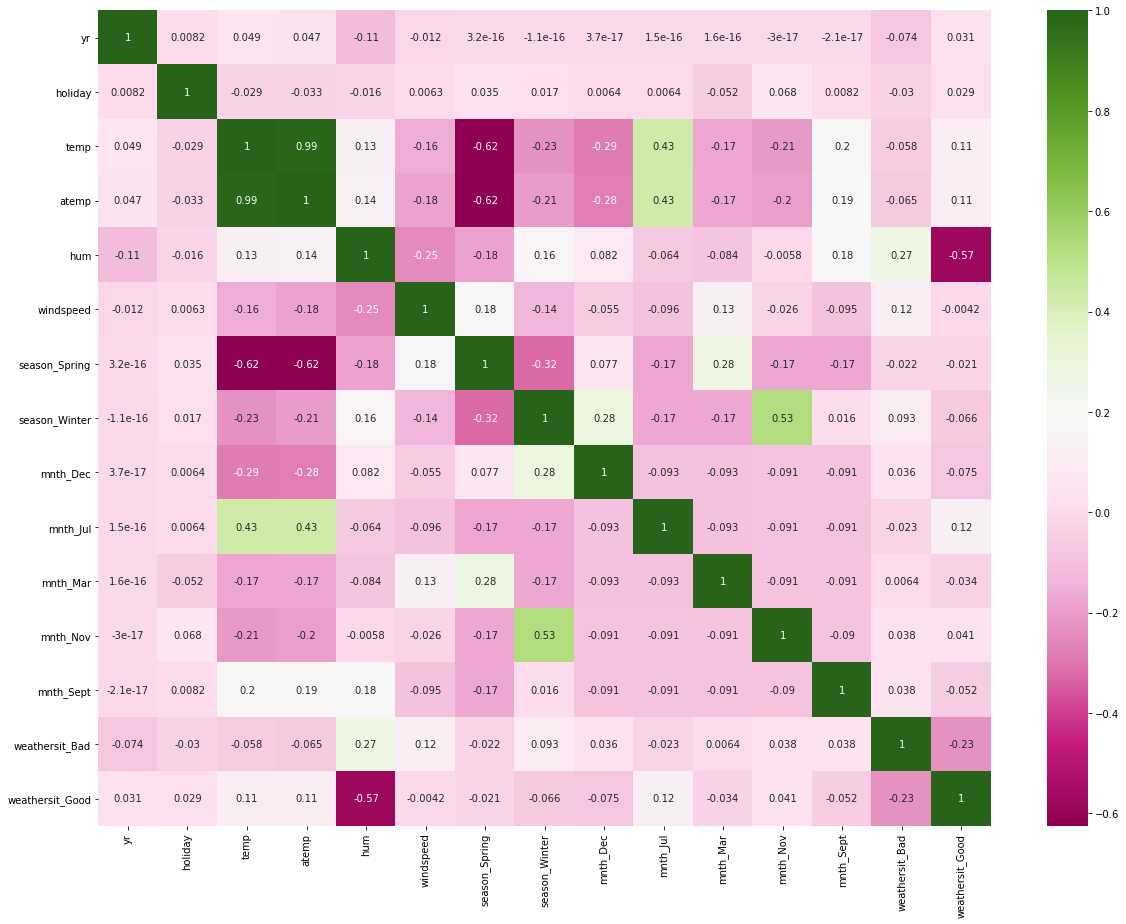

In [40]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (20,15))
sns.heatmap(bs[['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sept', 'weathersit_Bad', 'weathersit_Good']].corr(), cmap='PiYG', annot=True)
plt.show()

In [41]:
#Model 1
#Removing atemp variable because of high VIF 
cols=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sept', 'weathersit_Bad', 'weathersit_Good']
mdl(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Thu, 21 Oct 2021   Prob (F-statistic):          1.03e-186
Time:                        16:30:27   Log-Likelihood:                -4125.1
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     496   BIC:                             8344.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2792.3701    338.868     

In [42]:
#Model 2
#Removing 'hum' variable because of negative coefiicient.
cols=['yr', 'holiday', 'temp', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sept', 'weathersit_Bad', 'weathersit_Good']
mdl(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.7
Date:                Thu, 21 Oct 2021   Prob (F-statistic):          1.75e-184
Time:                        16:30:27   Log-Likelihood:                -4133.2
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     497   BIC:                             8354.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1806.4555    235.127     

In [43]:
#Model 3
#Removing 'Temp' variable because of high VIF.
cols=['yr', 'holiday', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sept', 'weathersit_Bad', 'weathersit_Good']
mdl(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     154.3
Date:                Thu, 21 Oct 2021   Prob (F-statistic):          4.21e-159
Time:                        16:30:27   Log-Likelihood:                -4196.2
No. Observations:                 511   AIC:                             8418.
Df Residuals:                     498   BIC:                             8474.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4183.9580    136.694     

In [56]:
#Model 4
#Removing 'windspeed' variable because of high coef.
cols=['yr', 'holiday', 'temp',
       'season_Winter', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sept','season_Spring', 'weathersit_Good']
mdl(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     206.8
Date:                Thu, 21 Oct 2021   Prob (F-statistic):          1.60e-170
Time:                        16:33:26   Log-Likelihood:                -4174.6
No. Observations:                 511   AIC:                             8371.
Df Residuals:                     500   BIC:                             8418.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             950.4840    213.625     

In [55]:
#Model 5
#Removing 'holiday' variable because P>t is high.
cols=['yr', 'temp','season_Winter', 'mnth_Dec', 'mnth_Mar', 'mnth_Nov','mnth_Jul',
       'mnth_Sept','season_Spring', 'weathersit_Good']
mdl(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     209.4
Date:                Thu, 21 Oct 2021   Prob (F-statistic):          1.28e-171
Time:                        16:33:22   Log-Likelihood:                -4172.0
No. Observations:                 511   AIC:                             8366.
Df Residuals:                     500   BIC:                             8413.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1093.2954    217.393     

1. We can choose Model 5 for our evaluation because the deference between Rsquared and adjusted R squared is very less and the      almost for all the variables P>t is 0

2. The VIF for the variables is also then 5 which is good. 

# Model Evaluation 

Residual Analysis

In [46]:
#Build a model with all columns to select features automatically
def b_m(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [47]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'temp',
       'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sept','season_Spring', 'weathersit_Good']


In [48]:
#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1093.2954088037932 [ 2036.93314092  3757.30856793   760.02877672  -541.19175043
  -486.97003167   448.94611987  -637.2447184    420.91497559
 -1274.59092119   818.75533169]


# Model Evaluation

Residual Analysis

In [49]:
y_train_pred = lr.predict(X_train[cols])

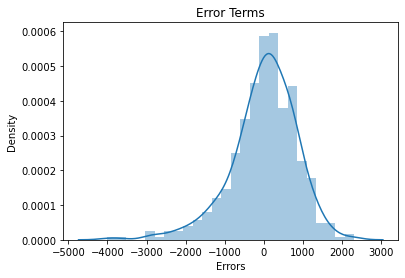

In [50]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')
plot_res_dist(y_train, y_train_pred)

Errors are normally distributed with mean 0

To check our model is correct
Print R-squared Value

In [51]:
r2_score(y_train,y_train_pred)

0.8072494165992908

R-squared : 0.8072
Which is same as our final MODEL which is # MODEL 5

# Final Step Interpreting the model

In [52]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'temp','season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sept','season_Spring', 'weathersit_Good']


In [53]:
lm = mdl(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     209.4
Date:                Thu, 21 Oct 2021   Prob (F-statistic):          1.28e-171
Time:                        16:30:28   Log-Likelihood:                -4172.0
No. Observations:                 511   AIC:                             8366.
Df Residuals:                     500   BIC:                             8413.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1093.2954    217.393     

1. Based on previous data it is expected increase of number of users once situation comes back to normal, compared to last year.
2. Company should focus on expanding business during Spring.
3. People booking the bikes is leass in winters so company should focus to service the bikes at winter season so that the business is not hampered
4. Demand for bike is mostly on March, July, sept, Nov, Dec
5. Demand for bike is also on holidays/Sundays. 
